In [34]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r'Mental-Health-Twitter.csv')

# Show basic info
print(df.shape)
df.head()


(20000, 11)


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [35]:
df = df.drop(columns=['Unnamed: 0'])

In [36]:
# Check for missing values
print(df.isnull().sum())

post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64


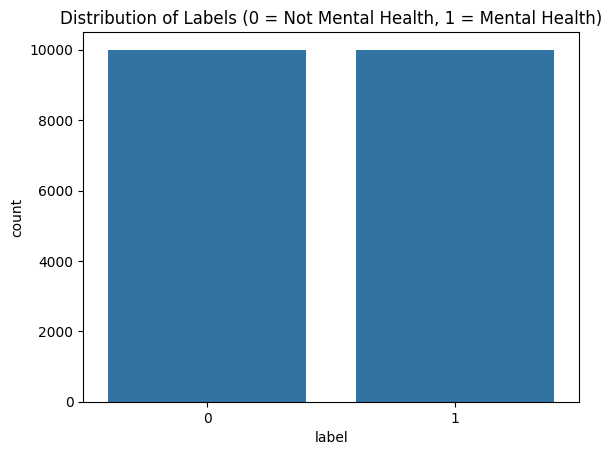

label
1    10000
0    10000
Name: count, dtype: int64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels (0 = Not Mental Health, 1 = Mental Health)')
plt.show()

# Optional: show exact numbers
print(df['label'].value_counts())


In [38]:
# Check for completely duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
                  post_id                    post_created  \
141    631531032924303360  Wed Aug 12 18:21:46 +0000 2015   
142    631531032924303360  Wed Aug 12 18:21:46 +0000 2015   
392    659337651514945537  Wed Oct 28 11:55:20 +0000 2015   
393    659337651514945537  Wed Oct 28 11:55:20 +0000 2015   
537    655952866184679424  Mon Oct 19 03:45:24 +0000 2015   
...                   ...                             ...   
19599  810367005513498626  Sun Dec 18 06:12:04 +0000 2016   
19787  819407379729158145  Thu Jan 12 04:55:17 +0000 2017   
19788  819407379729158145  Thu Jan 12 04:55:17 +0000 2017   
19936  819356367295311873  Thu Jan 12 01:32:35 +0000 2017   
19937  819356367295311873  Thu Jan 12 01:32:35 +0000 2017   

                                               post_text     user_id  \
141    RT @richardbranson: Read this wonderful blog a...  1013187241   
142    RT @richardbranson: Read this wonderful blog a...  1013187241   
392    College minor in subst

# Preprocessing

In [39]:
import pandas as pd
import re
import nltk
import emoji
import contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


ModuleNotFoundError: No module named 'contractions'

In [40]:
# Load the data
df = pd.read_csv(r'Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [41]:
df_cleaned = df.copy()

In [42]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])
df_cleaned = df_cleaned.drop_duplicates(keep=False)

In [43]:
# Define a function to remove URLs and mark if there was a URL
def remove_urls(text):
    url_pattern = r'http\S+|www\S+'
    has_url = bool(re.search(url_pattern, text))  # Check if there is a URL
    cleaned_text = re.sub(url_pattern, '', text)  # Remove URLs
    return cleaned_text, has_url

# Apply the function to each row
df_cleaned[['post_text', 'URLs']] = df_cleaned['post_text'].apply(lambda x: pd.Series(remove_urls(x)))

# Done!
df_cleaned[['post_text', 'URLs']].head()

,post_text,URLs
0,It's just over 2 years since I was diagnosed w...,False
1,"It's Sunday, I need a break, so I'm planning t...",False
2,Awake but tired. I need to sleep but my brain ...,False
3,RT @SewHQ: #Retro bears make perfect gifts and...,True
4,It’s hard to say whether packing lists are mak...,False


In [44]:
# --- Step 2: Remove Mentions and track ---
def remove_mentions(text):
    mention_pattern = r'@\w+'
    has_mention = bool(re.search(mention_pattern, text))
    cleaned_text = re.sub(mention_pattern, '', text)
    return cleaned_text, has_mention

df_cleaned[['post_text', 'Mentions']] = df_cleaned['post_text'].apply(lambda x: pd.Series(remove_mentions(x)))
df_cleaned[['post_text', 'Mentions']].head()


,post_text,Mentions
0,It's just over 2 years since I was diagnosed w...,False
1,"It's Sunday, I need a break, so I'm planning t...",False
2,Awake but tired. I need to sleep but my brain ...,False
3,RT : #Retro bears make perfect gifts and are g...,True
4,It’s hard to say whether packing lists are mak...,False


In [45]:
# --- Step 3: Handle Hashtags (extract and optionally remove) ---
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)  # Find hashtags
    return hashtags

# Extract hashtags into a new column
df_cleaned['Hashtags'] = df_cleaned['post_text'].apply(lambda x: extract_hashtags(x))
df_cleaned[['post_text', 'Hashtags']].head()

,post_text,Hashtags
0,It's just over 2 years since I was diagnosed w...,"[#anxiety, #depression]"
1,"It's Sunday, I need a break, so I'm planning t...",[#A14]
2,Awake but tired. I need to sleep but my brain ...,[]
3,RT : #Retro bears make perfect gifts and are g...,"[#Retro, #yay]"
4,It’s hard to say whether packing lists are mak...,"[#movinghouse, #anxiety]"


In [49]:
# (Optional) If you want to also REMOVE hashtags from the post_text:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Uncomment below line if you want to remove hashtags from the post_text
df_cleaned['post_text'] = df_cleaned['post_text'].apply(lambda x: remove_hashtags(x))

# View the result
df_cleaned[['post_text', 'URLs', 'Mentions', 'Hashtags']].head()

,post_text,URLs,Mentions,Hashtags
0,It's just over 2 years since I was diagnosed w...,False,False,"[#anxiety, #depression]"
1,"It's Sunday, I need a break, so I'm planning t...",False,False,[#A14]
2,Awake but tired. I need to sleep but my brain ...,False,False,[]
3,RT : bears make perfect gifts and are great f...,True,True,"[#Retro, #yay]"
4,It’s hard to say whether packing lists are mak...,False,False,"[#movinghouse, #anxiety]"


In [52]:
import re
from collections import Counter
import pandas as pd

# Example slang list
slang_words = [
    'lol', 'omg', 'idk', 'lmao', 'brb', 'btw', 'imo', 'tbh', 'gonna', 'wanna',
    'yolo', 'smh', 'fyi', 'gr8', 'b4', 'bff', 'cya', 'plz', 'rofl', 'thx'
]

# Function to clean text (you can expand this based on your needs)
def clean_text(text):
    # Remove non-alphanumeric characters, convert to lowercase
    return re.sub(r'[^a-zA-Z\s]', '', str(text).lower())

# Add a cleaned version of the post text to the DataFrame
df['cleaned'] = df['post_text'].apply(clean_text)

# Function to find slang words
def find_slang(text, slang_list):
    found = []
    words = re.findall(r'\b\w+\b', str(text).lower())
    for word in words:
        if word in slang_list:
            found.append(word)
    return found

# Find all slang words
df['slang_found'] = df['cleaned'].apply(lambda x: find_slang(x, slang_words))

# Flatten slang list
all_slangs = [word for slang_list in df['slang_found'] for word in slang_list]

# Count slang
slang_counter = Counter(all_slangs)

# Total slang words
total_slang_words = sum(slang_counter.values())

# Tweets containing slang
tweets_with_slang = df[df['slang_found'].apply(lambda x: len(x) > 0)].shape[0]

# Create DataFrame table
slang_df = pd.DataFrame(slang_counter.items(), columns=['Slang Word', 'Count'])
slang_df = slang_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Output results
print(f"Total slang words found: {total_slang_words}")
print(f"Number of tweets containing slang: {tweets_with_slang}")
print("\nSlang Word Count Table:")
print(slang_df)


Total slang words found: 883
Number of tweets containing slang: 816

Slang Word Count Table:
   Slang Word  Count
0       gonna    197
1         lol    193
2       wanna    136
3         omg     98
4         tbh     57
5         smh     56
6        lmao     52
7         idk     46
8         thx     11
9         btw     11
10        plz      7
11        brb      7
12        fyi      6
13        bff      3
14        cya      1
15       yolo      1
16       rofl      1


In [53]:
import re
from collections import Counter
import pandas as pd

# Define a custom list of stopwords (can be extended as needed)
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn',
    'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
]

# Function to remove stopwords and get common words
def remove_stopwords(text, stopwords):
    words = re.findall(r'\b\w+\b', str(text).lower())  # Tokenize and lowercase
    filtered_words = [word for word in words if word not in stopwords]  # Remove stopwords
    return filtered_words

# Apply the function to remove stopwords from text
df_cleaned['filtered_words'] = df_cleaned['post_text'].apply(lambda x: remove_stopwords(x, stopwords))

# Flatten the list of filtered words
all_filtered_words = [word for word_list in df_cleaned['filtered_words'] for word in word_list]

# Count the words
word_counter = Counter(all_filtered_words)

# Total filtered words
total_filtered_words = sum(word_counter.values())

# Create DataFrame table for word counts
word_count_df = pd.DataFrame(word_counter.items(), columns=['Word', 'Count'])
word_count_df = word_count_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Output results
print(f"Total filtered words (after removing stopwords): {total_filtered_words}")
print("\nTop Common Words (After Removing Stopwords):")
print(word_count_df.head())  # Display the top common words


Total filtered words (after removing stopwords): 128114

Top Common Words (After Removing Stopwords):
         Word  Count
0          rt   3799
1        like    982
2  depression    838
3         one    707
4         get    608
